Блок 1: Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
dataset_file = "/home/ubuntu/SPPR/data-4275-2021-02-09.xlsx"
df = pd.read_excel(dataset_file)

# Просмотр структуры данных
print("Размер датафрейма:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

Размер датафрейма: (17016, 15)

Первые 5 строк:


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",(499) 183-14-10,48,нет,37.714565,55.879002,"{type=Point, coordinates=[37.71456500043604, 5..."
1,77874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",(495) 676-55-35,35,нет,37.673306,55.738239,"{type=Point, coordinates=[37.6733061300344, 55..."
2,24309,Кафе «Академия»,637376349,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",(495) 662-30-10,95,нет,37.669648,55.735511,"{type=Point, coordinates=[37.6696475969381, 55..."
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",(499) 908-06-15,240,нет,37.566940,55.904019,"{type=Point, coordinates=[37.56694, 55.9040188..."
4,148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",(495) 697-04-89,10,нет,37.598128,55.747390,"{type=Point, coordinates=[37.59812754843999, 5..."



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17016 non-null  int64  
 1   Name              17016 non-null  object 
 2   global_id         17016 non-null  int64  
 3   IsNetObject       17016 non-null  object 
 4   OperatingCompany  3327 non-null   object 
 5   TypeObject        17016 non-null  object 
 6   AdmArea           17016 non-null  object 
 7   District          17016 non-null  object 
 8   Address           17016 non-null  object 
 9   PublicPhone       17016 non-null  object 
 10  SeatsCount        17016 non-null  int64  
 11  SocialPrivileges  17016 non-null  object 
 12  Longitude_WGS84   17016 non-null  float64
 13  Latitude_WGS84    17016 non-null  float64
 14  geoData           17016 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1.9+ MB


Блок 2: Pie Charts - Распределение заведений по типам

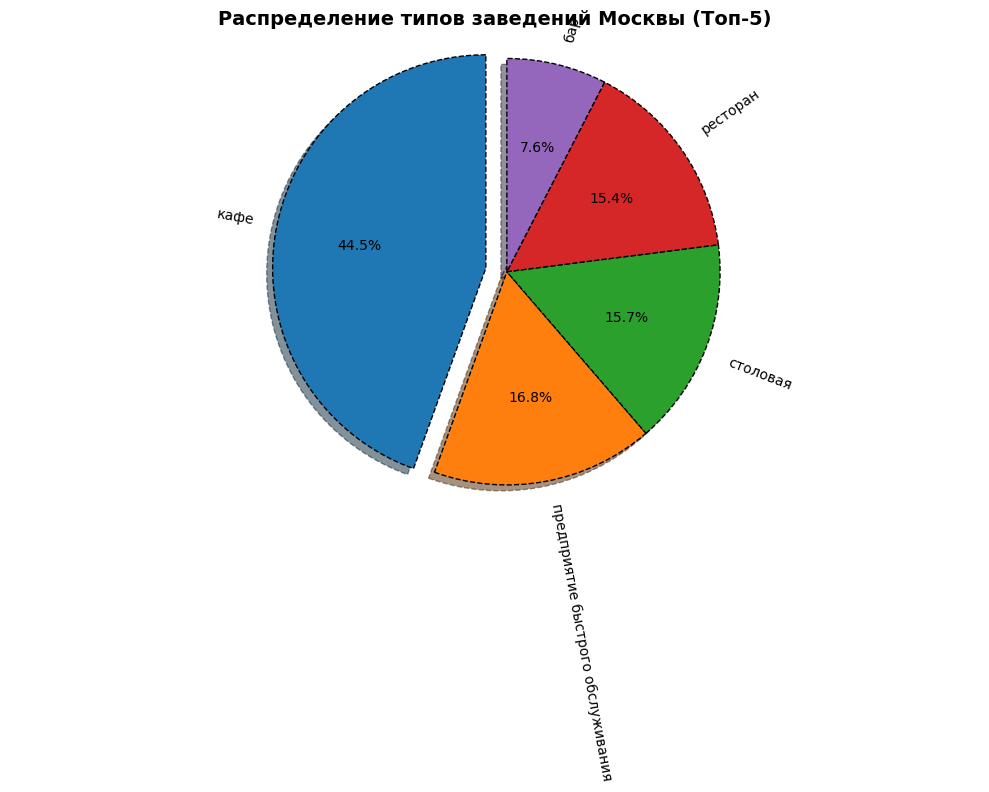

Количество заведений по типам:
кафе                                 6535
предприятие быстрого обслуживания    2471
столовая                             2307
ресторан                             2263
бар                                  1113
кафетерий                             944
буфет                                 499
закусочная                            493
магазин (отдел кулинарии)             391
Name: TypeObject, dtype: int64


In [3]:
# Задание 1: Pie Charts - Типы заведений Москвы
type_counts = df['TypeObject'].value_counts()

# Создаем данные для диаграммы
vals = type_counts.values[:5]  # Берем топ-5 типов заведений
labels = type_counts.index[:5]

# Выделяем самый популярный тип
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,
       wedgeprops={'linewidth': 1, 'linestyle': '--', 'edgecolor': 'black'},
       rotatelabels=True, startangle=90)

ax.set_title('Распределение типов заведений Москвы (Топ-5)', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

# Выводим статистику
print("Количество заведений по типам:")
print(type_counts)

Блок 3: Box Plots - Распределение количества мест по округам

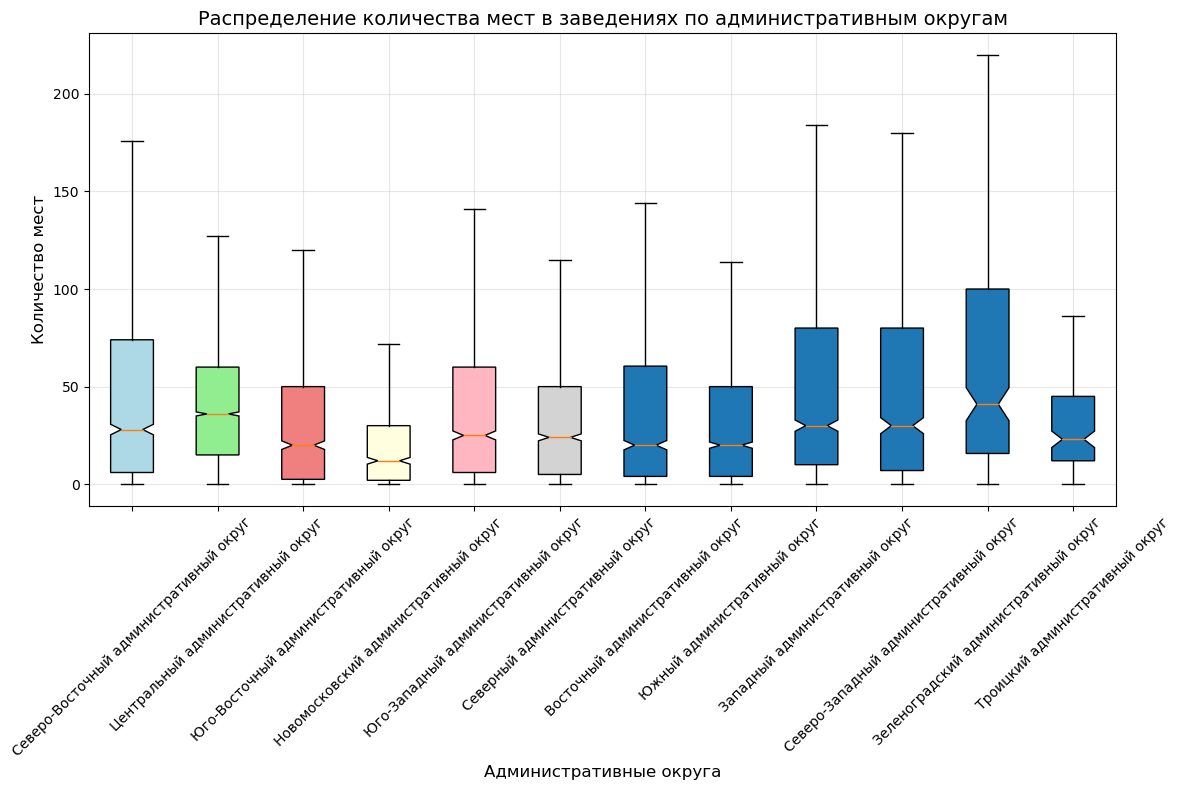

Среднее количество мест по округам:
AdmArea
Восточный административный округ           52.4
Западный административный округ            60.2
Зеленоградский административный округ      65.6
Новомосковский административный округ      26.7
Северный административный округ            43.0
Северо-Восточный административный округ    55.4
Северо-Западный административный округ     56.6
Троицкий административный округ            40.6
Центральный административный округ         50.1
Юго-Восточный административный округ       45.8
Юго-Западный административный округ        48.4
Южный административный округ               47.3
Name: SeatsCount, dtype: float64


In [4]:
# Задание 2: Box Plots - Количество мест по административным округам
plt.figure(figsize=(12, 8))

# Группируем данные по округам
adm_areas = df['AdmArea'].unique()
data_by_area = []

for area in adm_areas:
    seats_data = df[df['AdmArea'] == area]['SeatsCount'].dropna()
    data_by_area.append(seats_data)

# Создаем box plot
bp = plt.boxplot(data_by_area, patch_artist=True, notch=True, vert=True,
                labels=adm_areas, showfliers=False)

# Настройка внешнего вида
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Распределение количества мест в заведениях по административным округам', fontsize=14)
plt.xlabel('Административные округа', fontsize=12)
plt.ylabel('Количество мест', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика по округам
print("Среднее количество мест по округам:")
print(df.groupby('AdmArea')['SeatsCount'].mean().round(1))

Блок 4: Scatter Plots - Географическое распределение заведений

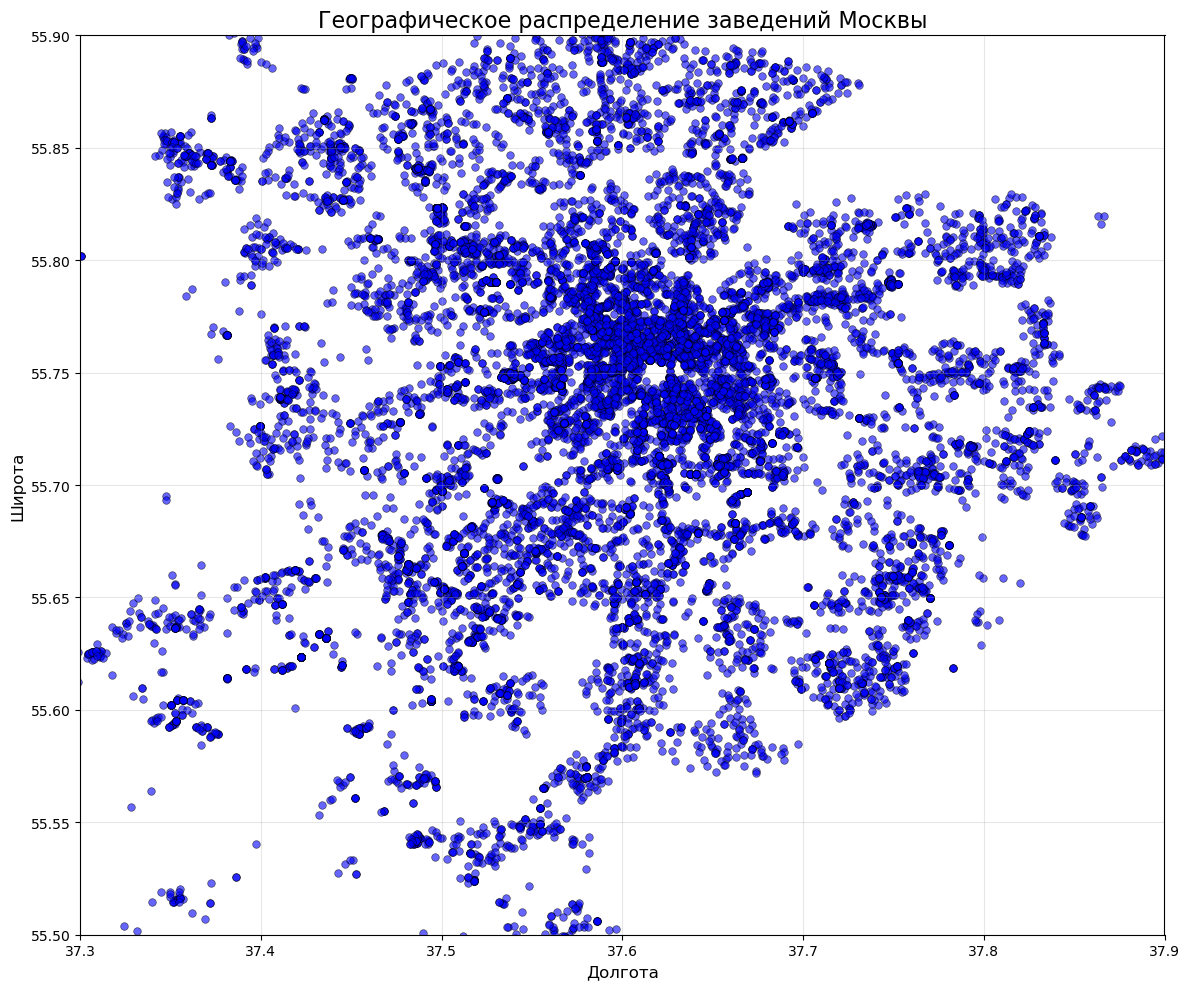

Всего отображено заведений: 17016


In [6]:
# Задание 3: Scatter Plots - Расположение заведений на карте Москвы
plt.figure(figsize=(12, 10))

# Используем координаты для scatter plot
x = df['Longitude_WGS84'].dropna()
y = df['Latitude_WGS84'].dropna()

# Создаем scatter plot
plt.scatter(x, y, s=30, c='blue', alpha=0.6, edgecolors='black', linewidth=0.5)

plt.title('Географическое распределение заведений Москвы', fontsize=16)
plt.xlabel('Долгота', fontsize=12)
plt.ylabel('Широта', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавляем примерные границы Москвы для ориентира
plt.xlim(37.3, 37.9)
plt.ylim(55.5, 55.9)

plt.tight_layout()
plt.show()

print(f"Всего отображено заведений: {len(x)}")

Блок 5: Bubble Plots - Зависимость размера заведения от местоположения

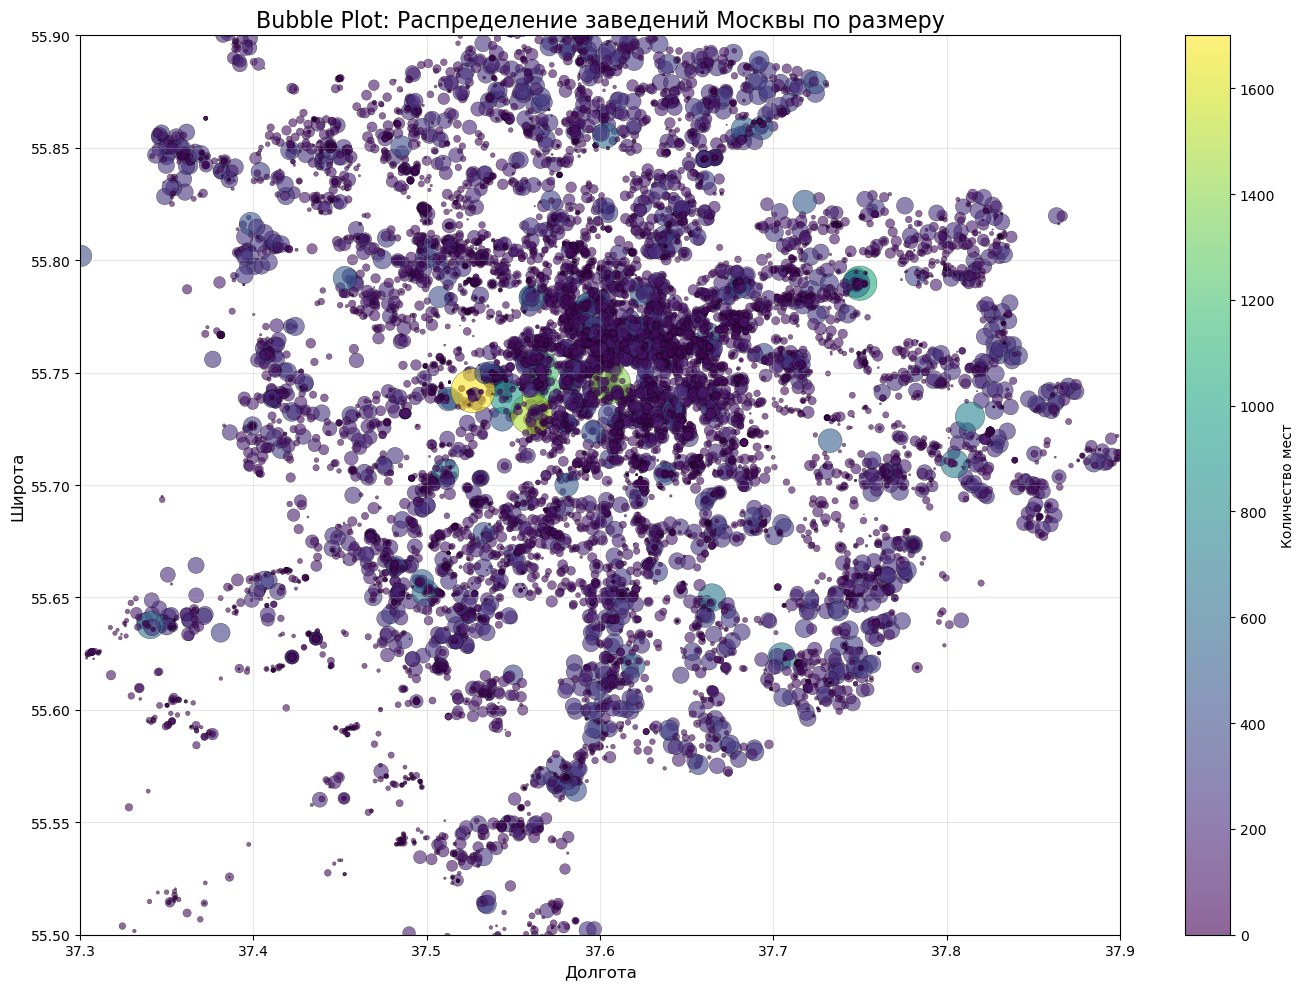

In [7]:
# Задание 4: Bubble Plots - Размер заведений на карте
plt.figure(figsize=(14, 10))

# Подготавливаем данные
bubble_df = df.dropna(subset=['Longitude_WGS84', 'Latitude_WGS84', 'SeatsCount'])
x = bubble_df['Longitude_WGS84']
y = bubble_df['Latitude_WGS84']
z = bubble_df['SeatsCount'] / bubble_df['SeatsCount'].max()  # Нормализуем для размера пузырьков

# Создаем bubble plot с цветом по количеству мест
scatter = plt.scatter(x, y, s=z*1000, c=bubble_df['SeatsCount'], 
                     alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.3)

plt.colorbar(scatter, label='Количество мест')
plt.title('Bubble Plot: Распределение заведений Москвы по размеру', fontsize=16)
plt.xlabel('Долгота', fontsize=12)
plt.ylabel('Широта', fontsize=12)
plt.grid(True, alpha=0.3)

# Устанавливаем границы Москвы
plt.xlim(37.3, 37.9)
plt.ylim(55.5, 55.9)

plt.tight_layout()
plt.show()

Блок 6: Дополнительное задание - Scatter Plots "Лестница заведений"

Строим лестницу из 11 ступенек


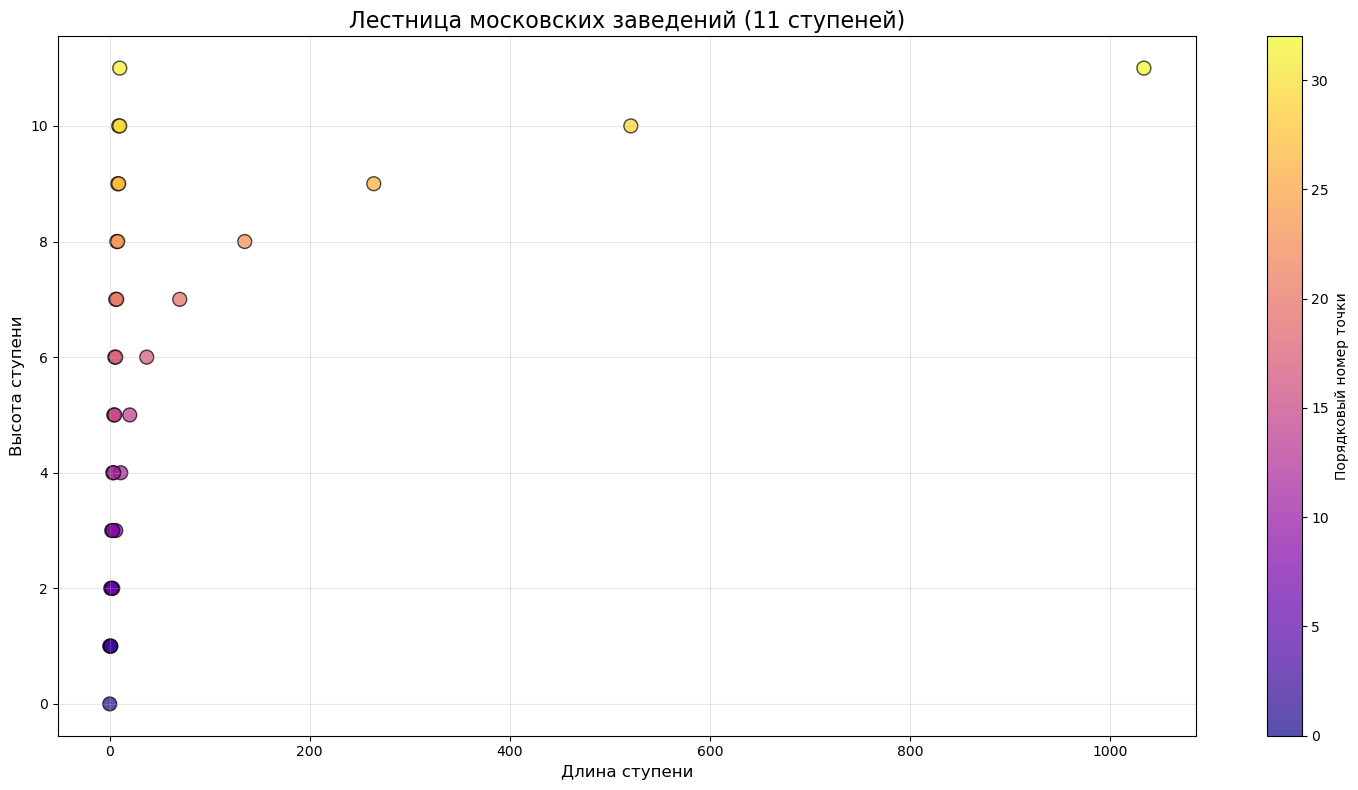

In [8]:
# Дополнительное задание: Лестница из заведений
np.random.seed(42)
num_steps = np.random.randint(5, 15)  # Случайное количество ступенек
print(f"Строим лестницу из {num_steps} ступенек")

# Создаем координаты для лестницы
x_stairs = []
y_stairs = []
length = 1

for i in range(num_steps):
    x_stairs.extend([i, i, i + length])
    y_stairs.extend([i, i + 1, i + 1])
    length *= 2  # Увеличиваем длину ступени в 2 раза

plt.figure(figsize=(15, 8))
plt.scatter(x_stairs, y_stairs, s=100, c=range(len(x_stairs)), 
           cmap='plasma', alpha=0.7, edgecolors='black')

plt.title(f'Лестница московских заведений ({num_steps} ступеней)', fontsize=16)
plt.xlabel('Длина ступени', fontsize=12)
plt.ylabel('Высота ступени', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Порядковый номер точки')
plt.tight_layout()
plt.show()

Блок 7: Дополнительное задание - Иерархическая Pie Chart

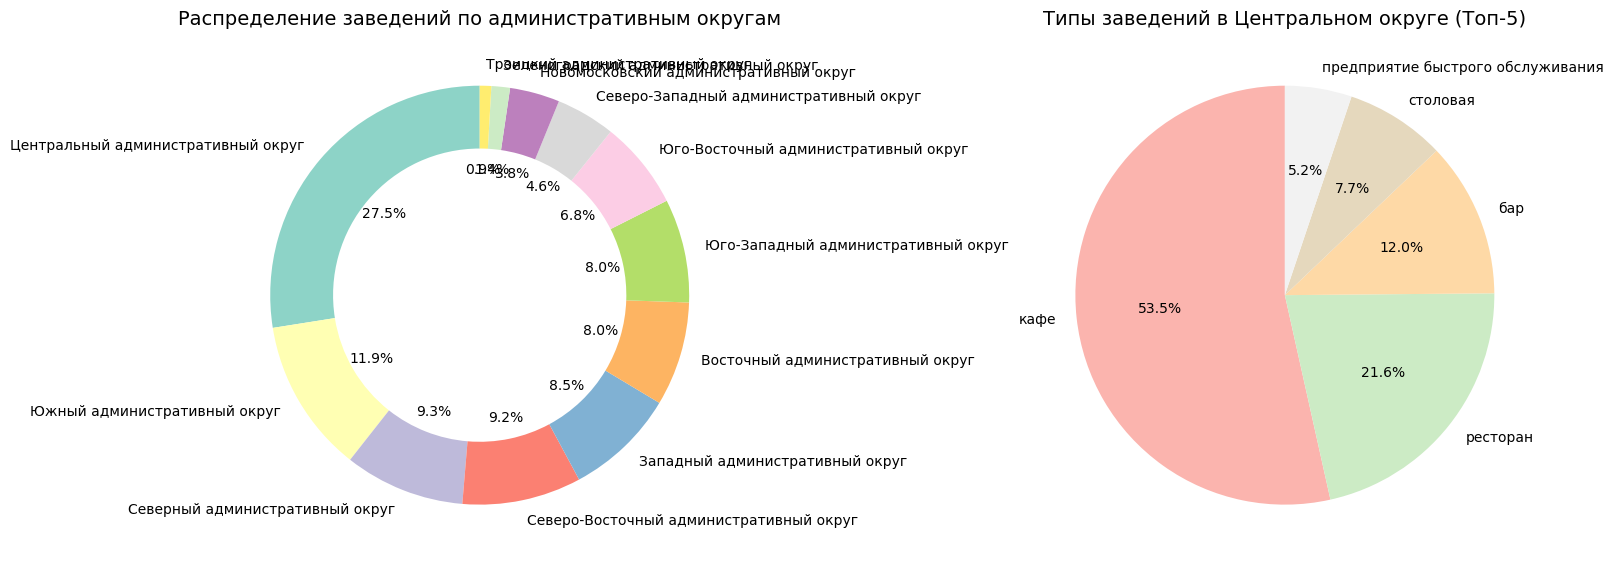

In [9]:
# Дополнительное задание: Иерархическая структура заведений
from matplotlib.patches import ConnectionPatch

# Создаем основную круговую диаграмму по округам
district_counts = df['AdmArea'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Основная диаграмма - административные округа
wedges, texts, autotexts = ax1.pie(district_counts.values, labels=district_counts.index,
                                  autopct='%1.1f%%', startangle=90,
                                  wedgeprops=dict(width=0.3), colors=plt.cm.Set3(np.linspace(0, 1, len(district_counts))))
ax1.set_title('Распределение заведений по административным округам', fontsize=14)

# Вложенная диаграмма - типы заведений для центрального округа
central_data = df[df['AdmArea'] == 'Центральный административный округ']
type_counts_central = central_data['TypeObject'].value_counts().head(5)

ax2.pie(type_counts_central.values, labels=type_counts_central.index,
        autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(type_counts_central))))
ax2.set_title('Типы заведений в Центральном округе (Топ-5)', fontsize=14)

plt.tight_layout()
plt.show()

Блок 8: Дополнительное задание - Анализ зависимости характеристик


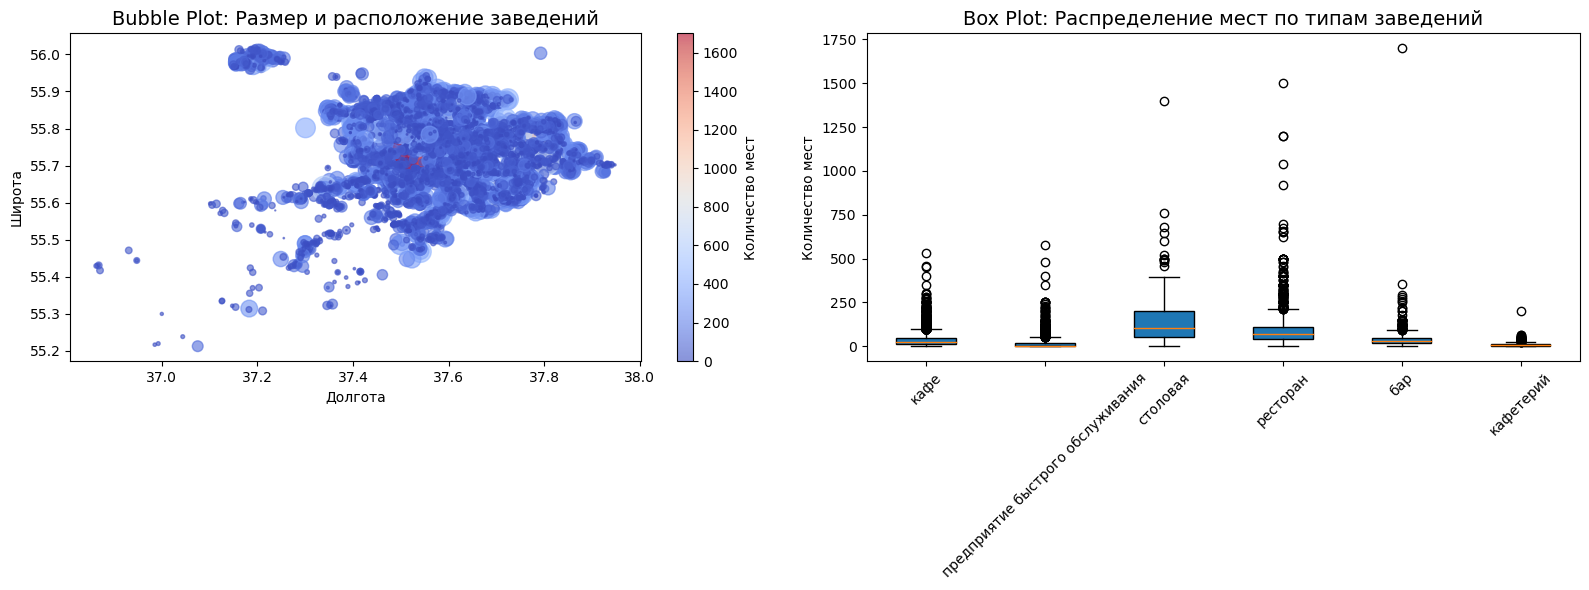

Статистика по заведениям:
Всего заведений в dataset: 17016
Среднее количество мест: 49.7
Максимальное количество мест: 1700


In [10]:
# Дополнительное задание: Анализ зависимости характеристик заведений
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bubble Plot: Зависимость между координатами и размером заведения
scatter1 = ax1.scatter(df['Longitude_WGS84'], df['Latitude_WGS84'], 
                      s=df['SeatsCount']/2, c=df['SeatsCount'], 
                      alpha=0.6, cmap='coolwarm')
ax1.set_title('Bubble Plot: Размер и расположение заведений', fontsize=14)
ax1.set_xlabel('Долгота')
ax1.set_ylabel('Широта')
plt.colorbar(scatter1, ax=ax1, label='Количество мест')

# Box Plot: Сравнение количества мест по типам заведений
top_types = df['TypeObject'].value_counts().head(6).index
filtered_df = df[df['TypeObject'].isin(top_types)]
data_by_type = [filtered_df[filtered_df['TypeObject'] == type_obj]['SeatsCount'].dropna() 
                for type_obj in top_types]

ax2.boxplot(data_by_type, labels=top_types, patch_artist=True)
ax2.set_title('Box Plot: Распределение мест по типам заведений', fontsize=14)
ax2.set_ylabel('Количество мест')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Выводим статистику
print("Статистика по заведениям:")
print(f"Всего заведений в dataset: {len(df)}")
print(f"Среднее количество мест: {df['SeatsCount'].mean():.1f}")
print(f"Максимальное количество мест: {df['SeatsCount'].max()}")